In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [3]:
review_data = pd.read_csv("Reviews.csv")
review_data = review_data[:10000]

## 1. Top-10 Reviewer

In [4]:
count_data = review_data.groupby(['UserId','ProfileName']).count()
sum_data = review_data.groupby(['UserId','ProfileName']).sum()
sort1 = count_data
sort1['Score count'] = count_data['Score']
sort1['Score mean'] = sum_data['Score']/count_data['Score']
sort1 = sort1.sort_values(['Score count'], ascending = False)
sort1.drop(columns=['Id','Score','ProductId','HelpfulnessNumerator',
                    'HelpfulnessDenominator','Time','Summary','Text'],inplace=False).head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 2. Plot score distribution for the user with the most number of reviews

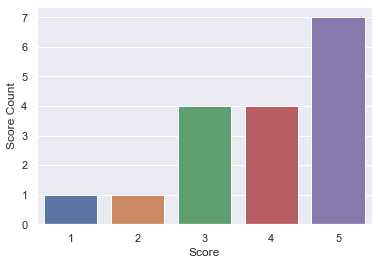

In [5]:
top_user = review_data[review_data['UserId'] == sort1.index[0][0]]
top_data = top_user.groupby('Score').count()
top_data['Score Count'] = top_data['Id']
sns.set()
sns.barplot(x=top_data.index, y=top_data['Score Count'])


## 3. Plot pandas Series DataFrame (Time->Date)

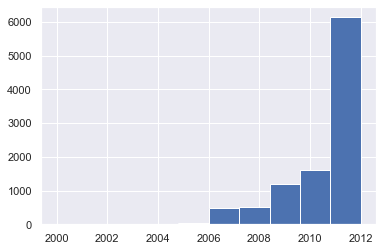

In [11]:
year_df = pd.to_datetime(review_data['Time'], unit = 's').dt.year
year_count = list(year_df.value_counts())
years = list(year_df.value_counts().keys())
year_df.hist()

## 4. Plot HeatMap using seaborn

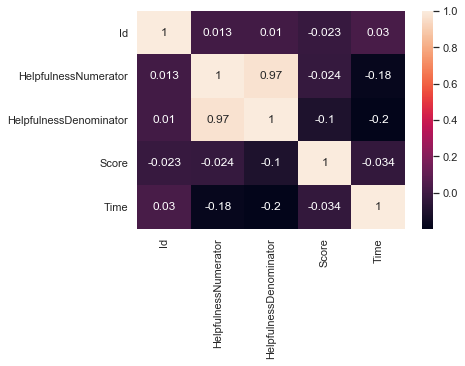

In [12]:
hm_data = review_data.drop(columns=['ProductId','UserId','ProfileName','Summary','Text'], inplace=False)
hm_data.corr()
sns.set()
sns.heatmap(hm_data.corr(), annot = True)

## 5. Helpful percent

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F613D98E80>]],
      dtype=object)

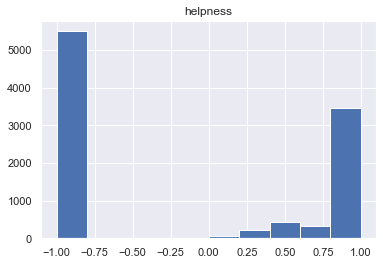

In [33]:
hp_data = review_data[review_data['HelpfulnessNumerator'] <= review_data['HelpfulnessDenominator']]
def filter_zero(a, b):
    if a!=0 and b!=0:
        return a/b
    else:
        return -1
hp_data['helpness'] = hp_data.apply(lambda x: filter_zero(x.HelpfulnessNumerator, x.HelpfulnessDenominator), axis=1)
hp_data.hist('helpness')